<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

## NB1_Adult_Income_Prediction- Introduction

  Dataset: The adult dataset is from the 1994 Census database. It is also known as “Census Income” dataset. Details of this dataset can be found at UCI Machine Learning Repository.The dataset used in this project has 32561 records and a binomial label indicating a salary of <=50K or >50K.
  
  Objective: To predict whether an individual’s annual income exceeds $50,000 USD using the set of variables in this data set. Read this file in directly from the URL address, named it "adult". Using Scikit learn to create following 4 different Machine Learning techniques:
  
    -K-nearest neighbor
    -Decision Tree
    -Random Forest
    -Bagging
    -Extra Trees
    -Gradient Boosting
    -AdaBoost
    -Stacking
    -Artificial Neural Network(ANN)
    -Stochastic Gradient Descent
    -SVM(Support Vector Machine)

In [3]:
import urllib
import requests
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [4]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [5]:
# Retrieving dataset from the web
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

adult = pd.read_csv(url, delimiter=',',header = None)
# displaying first 3 rows
adult[:3]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [6]:
# displaying last 3 rows
adult[32558:]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [7]:
# checking the shape of the dataframe(rows,columns)
adult.shape

(32561, 15)

In [8]:
# collecting all unpredictive columns and somewhat redundant data to drop such as education
# relationship and finalweight because education_num can represent education,
# gender and marital-status can represent relationship and finalweight isn't a considerable factor
# in predicting an individual's income.

column_list = [2]+[3]+[7]

In [9]:
# following command works only when I used header=None, if header is left unhandled 
# it raises an error "columns are not on axis=1" 
adult=adult.drop(column_list, axis= 1)

In [10]:
# https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
#  supplying a list to the set_axis method that is equal in length to the number of columns
# using set_axis with a list and inplace=False
adult = adult.set_axis(['age','workclass','education_num',
             'marital_status','occupation','race','gender','capital_gain','capital_loss',
              'hours_per_week','native_country','income'], axis='columns', inplace=False)


In [11]:
# rechecking dimension of the data frame
adult.shape

(32561, 12)

In [12]:
# all columns with their data type,range, null/non-null values  in the data frame

adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
age               32561 non-null int64
workclass         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
race              32561 non-null object
gender            32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
income            32561 non-null object
dtypes: int64(5), object(7)
memory usage: 3.0+ MB


### Adult Data Info:
1. Dataset description: Now, the dataset has 32561 observations and 12 variables. 
2. Objective: A supervised learning to learn the relationship between the independent variables such as 'workclass,"education", "occupation","working hours per week","race","age","gender" and the binary dependent variable which is Incomewith label: <=50K and >50K .
Altogether, 7 categorical and 5 numeric independent variables with all non-null values.
3.As per the documentaion page of the dataset: 7% have missing attribute values.
Class Distribution for Target variable:
Probability for the label '>50K' : 23.93% / 24.78% (without unknowns) 
Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns) 

In [13]:
# descriptive statistics for 'numeric' independent variables.
adult.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [14]:
# designating target variable name
targetName = 'income'
targetSeries = adult[targetName]
#remove target from current location and insert in column 0
del adult[targetName]
adult.insert(0, targetName, targetSeries)
#targetSeries #new target 
#reprint dataframe and see target is in position 0
adult[:3]


,income,age,workclass,education_num,marital_status,occupation,race,gender,capital_gain,capital_loss,hours_per_week,native_country
0,<=50K,39,State-gov,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States
1,<=50K,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States
2,<=50K,38,Private,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States


### Exploratory Data Analysis

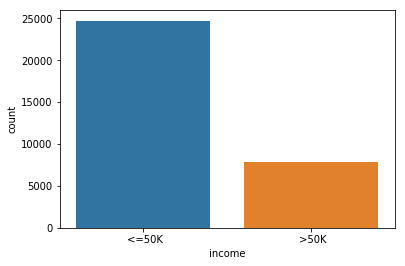

In [15]:
# EDA on target variable
sns.countplot(x='income', data=adult)  

#### 24720 people out of 32561 observations are making <=50k whereas 7841 people  are making >50k. 
Income: <=50K (76%), >=50K (24%), clearly an imbalanced data

In [16]:
# creating a new dataframe which contains all numeric variables
num_df = adult.select_dtypes(include=['int64']).copy()

num_df.replace('^\s+', '', regex=True, inplace=True)
num_df[:3]

,age,education_num,capital_gain,capital_loss,hours_per_week
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40


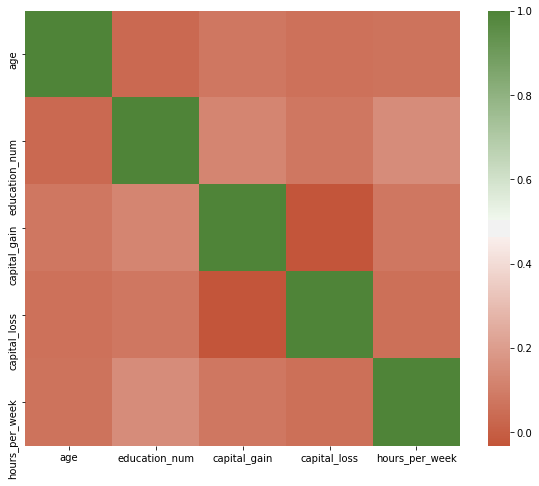

In [17]:
# Visual representation of correlation outputs using seaborn :
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = num_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(20,120, as_cmap=True),
            square=True, ax=ax)
# features are positively correlated with correlation value is below 0.50

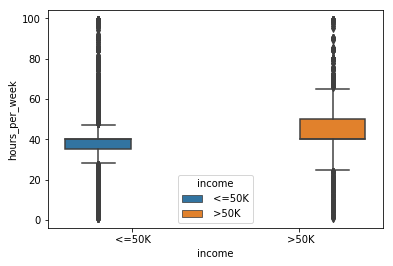

In [18]:
#let's check Income and worked-hours weekly
sns.boxplot(y='hours_per_week', x='income', data=adult, hue="income")

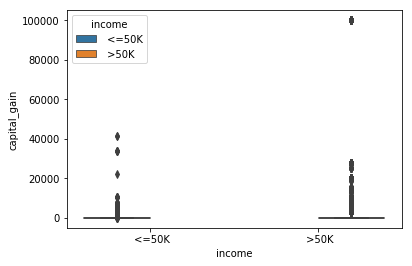

In [19]:
#let's check Income by capital_gain 
sns.boxplot(y='capital_gain', x='income', data=adult, hue="income")

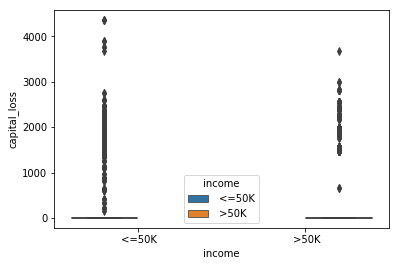

In [20]:
#let's check Income and capital loss
sns.boxplot(y='capital_loss', x='income', data=adult, hue="income")

capital_gain and capital_loss are two numeric independent variables describing income and loss from financial investments. 
As we can see, most observations have 0  capital gain and/or capital loss,
dropping it for it's not predictive for further analysis.

In [21]:
adult = adult.drop(['capital_gain','capital_loss'], axis=1)

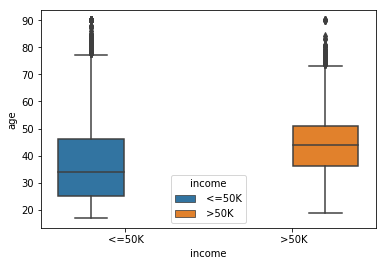

In [22]:
#let's check age versus income
sns.boxplot(y='age', x='income', data=adult, hue="income")

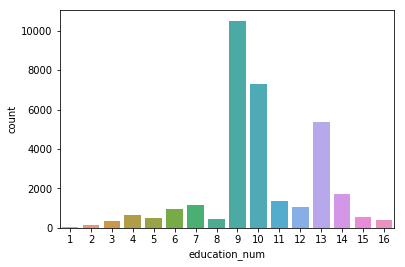

In [23]:
sns.countplot(x='education_num', data=adult,)

As we see, 32% are high school graduates(approx. 10420),22% went to some college(approx. 7163) and 16.5% have a bachelor’s degree(approx. 5373).
11th-7;HS-grad = 9; Bachelors=13;Masters-14;Doctorate-16.

In [24]:
adult['education_num'].describe()

count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education_num, dtype: float64

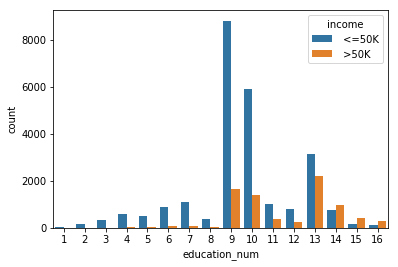

In [25]:
sns.countplot(x='education_num', hue='income', data=adult,)


More than 20,000 observations with bachelor's degree are making >50k followed by higher secondary graduates and some kind of college education. Interestingly,very less observations with Masters and Doctorate degrees are making >50k but good to see percentage of >50k is more than <=50k.

#### Let's check categorical variables

In [26]:
adult['gender'].value_counts()
#In the dataset, 67% are male and 33% female.

 Male      21790
 Female    10771
Name: gender, dtype: int64

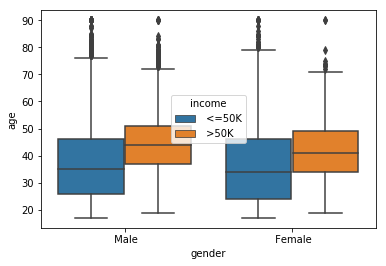

In [27]:
#let's check Income by age and gender
sns.boxplot(y='age', x='gender', data=adult, hue="income")

####  Clearly, boxplot is depicting that majority of the observations make less than  50,000 USD a year. 
Median  age  for  those  who make over 50,000 USD annually is in between 40-50 years.Outliers can be seen in people who're making over 50,000 USD and graph shows that female are underrepresenting here in comparison to male.

In [28]:
adult['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

Let's check out workclass variable, which describes the employment type such as farming, clerical or managerial. 69.4% values are Private;7.8% of values are self-employed with no income whereas 6% of values are unknown (‘?’).

I'd rename '?' as 'Unknown' category, then combine all government job into one class 'Govt_class', 'self-employed' jobs together. Similarly, 'without-pay' & 'never-worked' don't contribute to the data being separate, so, I'd combine it with 'Unknown'.

In [29]:
# finding all ' ?' values, notice that there's a space before ?
workclass_missing_ind = adult[adult['workclass'] == " ?"].index
#adult.loc[workclass_missing_ind]

In [30]:
# naming 'Unknown'
adult.loc[workclass_missing_ind, 'workclass'] = str(' Unknown')

In [31]:
# stripping leading space from the labels 
adult['workclass'] = adult['workclass'].str.strip()

In [32]:
# combining all government job together
govt_class = adult[(adult['workclass'] == "Federal-gov") + (adult['workclass'] == "Local-gov") + (adult['workclass'] == "State-gov")].index

In [33]:
#adult.loc[govt_class]

In [34]:
# naming as "Govt_class"
adult.loc[govt_class, 'workclass'] = str('Govt_class')

In [35]:
# checking out values
adult['workclass'].value_counts()

Private             22696
Govt_class           4351
Self-emp-not-inc     2541
Unknown              1836
Self-emp-inc         1116
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [36]:
# combining all government job together
self_employed = adult[(adult['workclass'] == "Self-emp-not-inc") + (adult['workclass'] == "Self-emp-inc")].index

In [37]:
#adult.loc[self_employed]

In [38]:
# naming the label
adult.loc[self_employed, 'workclass'] = str('Self_Employed')

In [39]:
# combining all uninformative groups together
Other_class = adult[(adult['workclass'] == "Without-pay") + (adult['workclass'] == "Never-worked")+(adult['workclass'] == "Unknown")].index

In [40]:
# naming the label
adult.loc[Other_class, 'workclass'] = str('Other_Class')

In [41]:
# now, we are left with four categories
adult['workclass'].value_counts()

Private          22696
Govt_class        4351
Self_Employed     3657
Other_Class       1857
Name: workclass, dtype: int64

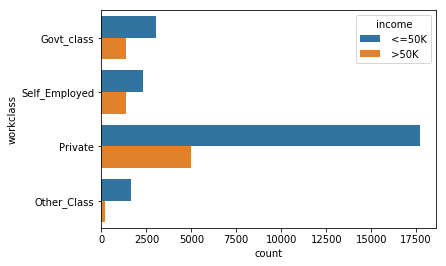

In [42]:
# let's check relationship between two categories of income and four categories of workclass
sns.countplot(y='workclass', hue='income', data=adult,)

As we observe, maximum observations are in 'private'workclass with  highly imbalanced income group.

Let's check occupation variable

In [43]:
# checking values
adult['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

12.7% are professional specialist, 6% values are unknown, evenly distributed except armed forces (0.03%) and private house servant (0.5%)

In [44]:
# stripping the ' ' from the label
adult['occupation'] = adult['occupation'].str.strip()

In [45]:
occupation_missing_ind = adult[adult['occupation'] == "?"].index
#adult.loc[occupation_missing_ind]

In [46]:
# renaming "Unknown"
adult.loc[occupation_missing_ind, 'occupation'] = str('Unknown')

In [47]:
# combining all administrative/managerial/executive/professional groups together
admin_jobs = adult[(adult['occupation'] == "Exec-managerial") + (adult['occupation'] == "Adm-clerical") +  (adult['occupation'] == "Prof-specialty")+ (adult['occupation'] == "Sales")].index

In [48]:
# naming "Admin"
adult.loc[admin_jobs, 'occupation'] = str('Admin')

In [49]:
# combining all different-sector profession together
tough_jobs = adult[(adult['occupation'] == "Craft-repair") + (adult['occupation'] == "Machine-op-inspct")+ (adult['occupation'] == "Transport-moving")+(adult['occupation'] == "Handlers-cleaners")+(adult['occupation'] == "Farming-fishing")].index

In [50]:
# naming "Tough_jobs"
adult.loc[tough_jobs, 'occupation'] = str('Tough_jobs')

In [51]:
# combining all different-sector profession together
services = adult[(adult['occupation'] == "Other-service") + (adult['occupation'] == "Tech-support")+ (adult['occupation'] == "Protective-serv")+(adult['occupation'] == "Priv-house-serv")+(adult['occupation'] == "Armed-Forces")].index

In [52]:
# naming "Services"
adult.loc[services, 'occupation'] = str('Services')

In [53]:
# finally, categories of occupation
adult['occupation'].value_counts()

Admin         15626
Tough_jobs    10062
Services       5030
Unknown        1843
Name: occupation, dtype: int64

So, we are left with four categories of occupation.

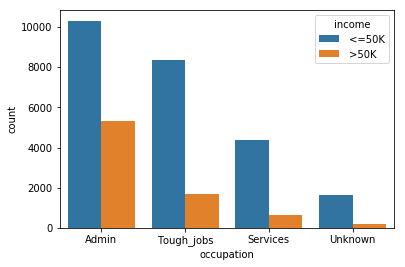

In [54]:
# let's check relationship between two categories of income and four categories of occupation
sns.countplot(x='occupation', hue='income', data=adult,) 

As we see, Admin occupation has highest number of observations with nearly half of them are having income over >50k group. On the contrary, Tough jobs has quite an imbalanced income groups.

In [55]:
# let's check categorical variable - 'marital status'
adult['marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

7 categories to indicate the marital status of 35162 observations.
46% are married, 33% are never married, 14% are divorced. Looking at the categories, married can be grouped into 1 category.

In [56]:
# stripping the ' ' from the label
adult['marital_status'] = adult['marital_status'].str.strip()

In [57]:
# combining all married groups together
married = adult[(adult['marital_status'] == "Married-civ-spouse") + (adult['marital_status'] == "Married-spouse-absent") +  (adult['marital_status'] == "Married-AF-spouse")].index

In [58]:
# naming "Admin"
adult.loc[married, 'marital_status'] = str('Married')

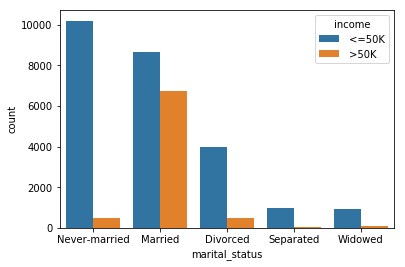

In [59]:
# let's check relationship between two categories of income and four categories of occupation
sns.countplot(x='marital_status', hue='income', data=adult,) 

Finally, only 5 categories are left and above plot is telling that nearly half of married people are making over 50k USD whereas other categories are showing just the opposite.

In [60]:
# stripping leading space from labels
adult['native_country'] =adult['native_country'].str.strip()

In [61]:
# check out the values
adult['native_country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

Altogether, 42 categories, 90% are from United States,1.97% are from Mexico whereas 1.79% values are unknown. Let's convert "?" to Unknown.


In [62]:
ntc_missing_ind = adult[adult['native_country'] == "?"].index
#adult.loc[ntc_missing_ind]

In [63]:
adult.loc[ntc_missing_ind, 'native_country'] = str('Unknown')

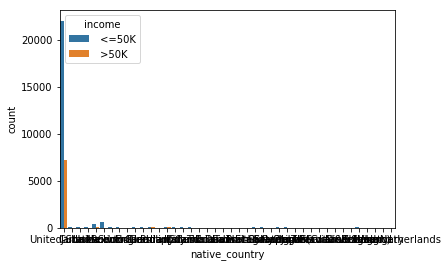

In [64]:
# let's check relationship between two categories of income and four categories of occupation
sns.countplot(x='native_country', hue='income', data=adult,) 

Native country displays high skewness as most observations are from United States. Not of very predictive nature, hence, excluding this variable from further analysis as well.

In [65]:
adult = adult.drop(['native_country'], axis=1)

In [66]:
# stripping leading space from labels
adult['race'] =adult['race'].str.strip()

In [67]:
# race is categorical variable
adult['race'].value_counts()
#86% are White and 10% are Black with negligible proportions of others

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

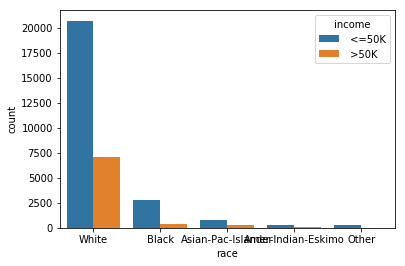

In [68]:
# let's check relationship between two categories of income and four categories of occupation
sns.countplot(x='race', hue='income', data=adult,) 

Bar plot shows that White have high earning potentials – over 25% of the observations of these 2 races make above $50,000 annually.

In [69]:
adult[:3]

,income,age,workclass,education_num,marital_status,occupation,race,gender,hours_per_week
0,<=50K,39,Govt_class,13,Never-married,Admin,White,Male,40
1,<=50K,50,Self_Employed,13,Married,Admin,White,Male,13
2,<=50K,38,Private,9,Divorced,Tough_jobs,White,Male,40


In [87]:

# All required packages
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import scipy.stats as ss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
import time 
from operator import itemgetter
import os
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [88]:
# let's check final look of the data frame
df = adult
df.head()
# So, we have 8 independent variables 

,income,age,workclass,education_num,marital_status,occupation,race,gender,hours_per_week
0,0,39,Govt_class,13,Never-married,Admin,White,Male,40
1,0,50,Self_Employed,13,Married,Admin,White,Male,13
2,0,38,Private,9,Divorced,Tough_jobs,White,Male,40
3,0,53,Private,7,Married,Tough_jobs,Black,Male,40
4,0,28,Private,13,Married,Admin,Black,Female,40


In [89]:
# binarize target variable
df['income'] = targetSeries
#label_binarize(df['income'], classes=['<=50K', '>50K'])
from sklearn import preprocessing
le_dep = preprocessing.LabelEncoder()
#to convert into numbers
df['income'] = le_dep.fit_transform(df['income'])

In [90]:
# perform data transformation
for col in df.columns[1:]:
	attName = col
	dType = df[col].dtype
	missing = pd.isnull(df[col]).any()
	uniqueCount = len(df[attName].value_counts(normalize=False))
	# discretize (create dummies)
	if dType == object:
		df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
		del df[attName]

In [91]:
# first 3 rows
df[:3]

,income,age,education_num,hours_per_week,workclass_Govt_class,workclass_Other_Class,workclass_Private,workclass_Self_Employed,marital_status_Divorced,marital_status_Married,...,occupation_Services,occupation_Tough_jobs,occupation_Unknown,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_ Female,gender_ Male
0,0,39,13,40,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,50,13,13,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,1
2,0,38,9,40,0,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,1


In [92]:
# define normal distribution fit function
def fit_dist(dfColumn):
# convert series into numpy array
    ndArray = np.array(dfColumn)
    # fit our data set against normal probability distribution
    parameters = eval("ss.norm.fit(ndArray)")
    
    # applying the Kolmogorov-Smirnof one sided test
    D,p = ss.kstest(ndArray, "norm",args=parameters)
    
    if D < 0.02 and p > 0.05:
                     
        return True
      
    else:
        return False
        
# 		return False  
    
# impute missing values
for col in df.columns[1:]:
	attName = col
	dType = df[col].dtype
	missing = pd.isnull(df[col]).any()
	uniqueCount = len(df[attName].value_counts(normalize=False))
	distCheck = fit_dist(df[attName])
	col_mean = df[attName].dropna().mean()
	col_median = df[attName].dropna().median()
	col_mode = df[attName].dropna().mode()
	if (distCheck == True and missing == True and uniqueCount > 2):
		df[attName] = df[attName].fillna(col_mean)
	if (distCheck == False and missing == True and uniqueCount > 2):
		df[attName] = df[attName].fillna(col_median)
	if (distCheck == False and missing == True and uniqueCount <= 2):
		df[attName] = df[attName].fillna(col_mode)

In [93]:
#df.shape #32561, 24
df.head()

,income,age,education_num,hours_per_week,workclass_Govt_class,workclass_Other_Class,workclass_Private,workclass_Self_Employed,marital_status_Divorced,marital_status_Married,...,occupation_Services,occupation_Tough_jobs,occupation_Unknown,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_ Female,gender_ Male
0,0,39,13,40,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,50,13,13,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,1
2,0,38,9,40,0,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,1
3,0,53,7,40,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,0,28,13,40,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [94]:
# split dataset into testing and training
income_train, income_test, income_train_target, income_test_target = train_test_split(
    df.ix[:,1:].values, df.ix[:,0].values, test_size=0.30, random_state=4)

In [96]:
# let's see the datasets' dimension
print(income_train.shape)
print(income_train_target.shape)

print(income_test.shape)
print(income_test_target.shape)


(22792, 23)
(22792,)
(9769, 23)
(9769,)


### K-Nearest Neighbor (KNN)

In [97]:
# 1st Model: k=3; metric='minkowski';weights='uniform'
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
neigh1 = KNeighborsClassifier(n_neighbors=3)
neigh1.fit(income_train, income_train_target) 
# make predictions
pred_Knn1 = neigh1.predict(income_test)
# summarize the fit of the model
print(confusion_matrix(income_test_target, pred_Knn1))
target_names = ["high-earner= no", "high-earner=yes"]
print(accuracy_score(income_test_target,pred_Knn1))
print(classification_report(income_test_target, pred_Knn1, target_names=target_names))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')
[0 0 1 ... 1 0 1]
[[6392 1009]
 [1058 1310]]
0.7884123247005835
                 precision    recall  f1-score   support

high-earner= no       0.86      0.86      0.86      7401
high-earner=yes       0.56      0.55      0.56      2368

      micro avg       0.79      0.79      0.79      9769
      macro avg       0.71      0.71      0.71      9769
   weighted avg       0.79      0.79      0.79      9769




Accuracy score is 79% here in KNN model using k=3; metric='minkowski';weights='uniform'.

For 'yes' (high-earner)) model achieves 56% precision and 55% recall. Precision tells us how many high-earner did our classifier predicted correctly that is 56% of observations predicted by the model were actual high-earner. On the other hand, 55% of the high-earner predicted by the model were predicted correctly,here, recall is predicted high-earner as a percentage of actual high-earner and that is 55%.

For 'no' (low-earner) model achieves 86% precision and 86% recall. Precision tells us how many low-earner did our classifier predicted correctly that is 86% of the time when model predicted low-earner it was low-earner. On the other hand, recall is predicted low-earner as a percentage of actual low-earner that is 86% of the actual low-earner was predicted by the model correctly.

For conclusion, model is performing okay in predicting high-earner that is 55%, whereas model is good in predicting low-earner that is 86%.

[[6392 1009]
 [1058 1310]]


Text(0.5, 0, 'Predicted label')

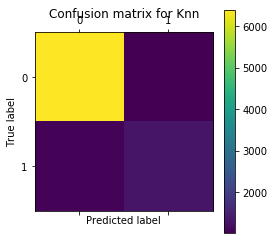

In [98]:
# display confusion matrix
K3_cm_trial1 = confusion_matrix(income_test_target, pred_Knn1)
print(K3_cm_trial1)
plt.matshow(K3_cm_trial1)
plt.title('Confusion matrix for Knn')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [99]:
#verifing Knn=3 using metric='minkowski';weights='uniform'  with cross validation 
scores_neigh1 = cross_val_score(neigh1, income_train, income_train_target, cv=10,scoring ='accuracy')
print("Cross Validation Score for each K",scores_neigh1)
scores_neigh1.mean()

Cross Validation Score for each K [0.79561404 0.79649123 0.79210526 0.78674857 0.78499342 0.7937692
 0.78411584 0.80386134 0.79552435 0.77743635]


0.791065959886852

As we can see, during the first iteration the model achieved the testing accuracy of 80%, in the 2nd iteration 81% and so on.
Range of testing accuracy is between 77.8%-80%.
Next, we're averaging the testing accuracy across all ten iterations and using that as our estimate of out-of-sample accuracy. 
Our mean accuracy score is 79.10% whereas train tests split accuracy score 78.84% 
Hence, we can say that this model with cross-validation is slightly (0.26) better performing.

In [100]:
# 2nd Model : k=3; metric='euclidean';weights='distance'
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
neigh2 = KNeighborsClassifier(n_neighbors=3,metric = 'euclidean',weights='distance')
neigh2.fit(income_train, income_train_target) 
# make predictions
pred_Knn2 = neigh2.predict(income_test)
# summarize the fit of the model
target_names = ["high-earner= no", "high-earner=yes"]
print(classification_report(income_test_target, pred_Knn2, target_names=target_names))
print(confusion_matrix(income_test_target, pred_Knn2))
print(accuracy_score(income_test_target,pred_Knn2))

                 precision    recall  f1-score   support

high-earner= no       0.85      0.87      0.86      7401
high-earner=yes       0.56      0.54      0.55      2368

      micro avg       0.79      0.79      0.79      9769
      macro avg       0.71      0.70      0.70      9769
   weighted avg       0.78      0.79      0.78      9769

[[6411  990]
 [1097 1271]]
0.7863650322448562


Accuracy score is around 79% here in KNN model using k=3; metric='euclidean';weights='distance'.

For 'yes' (high-earner)) model achieves 56% precision and 54% recall. Precision tells us how many high-earner did our classifier predicted correctly that is 56% of observations predicted by the model were actual high-earner. On the other hand, 54% of the high-earner predicted by the model were predicted correctly,here, recall is predicted high-earner as a percentage of actual high-earner and that is 54%.

For 'no' (low-earner) model achieves 85% precision and 87% recall. Precision tells us how many low-earner did our classifier predicted correctly that is 85% of the time when model predicted low-earner it was low-earner. On the other hand, recall is predicted low-earner as a percentage of actual low-earner that is 87% of the actual low-earner was predicted by the model correctly.

For conclusion, model is performing okay in predicting high-earner that is 54%, whereas model is way good in predicting low-earner that is 87%. Low precision for high-earner and relatively high precision for low-earner indicates that misclassification in high-earner class is more than low-earner which is 1097/990 in this case. 

[[6411  990]
 [1097 1271]]


Text(0.5, 0, 'Predicted label')

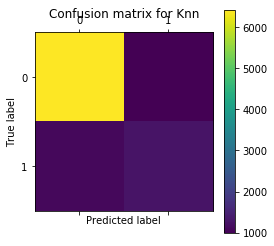

In [101]:
# display confusion matrix
K3_cm_trial2 = confusion_matrix(income_test_target, pred_Knn2)
print(K3_cm_trial2)
plt.matshow(K3_cm_trial2)
plt.title('Confusion matrix for Knn')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [102]:
#verifing Knn=3  with cross validation 
scores_neigh2 = cross_val_score(neigh2, income_train, income_train_target, cv=10,scoring ='accuracy')
print("Cross Validation Score for each K",scores_neigh2)
scores_neigh2.mean()

Cross Validation Score for each K [0.79342105 0.79122807 0.7877193  0.78806494 0.78279947 0.78850373
 0.77972795 0.79508556 0.79420799 0.77216857]


0.7872926634553694

knn using k=3; metric='euclidean';weights='distance'.

Range of testing accuracy is between 77.2%-79.5%. 
Our mean accuracy score is around 78.72%. 
Previous train tests split accuracy score = 78.63%.
So, we can say that this model with cross-validation is almost(0.09) nearly performing same as previous train tests split.

In [103]:
# 3rd Model : k=3; metric='manhattan';weights='distance'
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
neigh3 = KNeighborsClassifier(n_neighbors=3,metric = 'manhattan',weights='distance')
neigh3.fit(income_train, income_train_target) 
# make predictions
pred_Knn3 = neigh3.predict(income_test)
# summarize the fit of the model
target_names = ["high-earner= no", "high-earner=yes"]
print(classification_report(income_test_target, pred_Knn3,target_names=target_names))
print(confusion_matrix(income_test_target, pred_Knn3))
print(accuracy_score(income_test_target,pred_Knn3))

                 precision    recall  f1-score   support

high-earner= no       0.85      0.87      0.86      7401
high-earner=yes       0.57      0.52      0.55      2368

      micro avg       0.79      0.79      0.79      9769
      macro avg       0.71      0.70      0.70      9769
   weighted avg       0.78      0.79      0.79      9769

[[6466  935]
 [1129 1239]]
0.7887194185689426


Accuracy score is around 78.9% here in KNN model using k=3; metric='manhattan';weights='distance'.

For class=1 (high-earner)) model achieves 57% precision and 52% recall. 

For class-0 (low-earner) model achieves 85% precision and 87% recall. 

Again, model is performing not so okay in predicting high-earner that is 52%, whereas model is way good in predicting low-earner that is 87%. Low precision for high-earner and high precision for low-earner indicates that misclassification in high-earner class is more than low-earner which is 1129/935 in this case.

[[6466  935]
 [1129 1239]]


Text(0.5, 0, 'Predicted label')

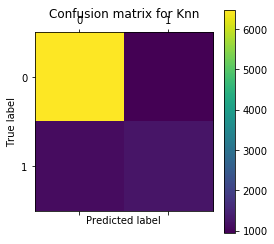

In [104]:
# display confusion matrix 
K3_cm_trial3 = confusion_matrix(income_test_target, pred_Knn3)
print(K3_cm_trial3)
plt.matshow(K3_cm_trial3)
plt.title('Confusion matrix for Knn')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [105]:
#verifing Knn=3  with cross validation 
scores_neigh3 = cross_val_score(neigh3, income_train, income_train_target, cv=10,scoring ='accuracy')
print("Cross Validation Score for each K",scores_neigh3)
scores_neigh3.mean()

Cross Validation Score for each K [0.79780702 0.79780702 0.79166667 0.79245283 0.79025889 0.79069767
 0.79289162 0.79947345 0.79508556 0.77831431]


0.7926455038880669

For KNN model using k=3; metric='manhattan';weights='distance' with cross-validation

Range of testing accuracy is between 77.8%-79.9%. 
Our mean accuracy score is around 79.26%. 
Previous train tests split accuracy score = 78.9%.
So, we can say that this model with cross-validation is slightly(0.36) better performing than previous train tests split.

In [106]:
# 4th Model : k=5; metric='euclidean';weights='distance'
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
neigh4 = KNeighborsClassifier(n_neighbors=5,metric='euclidean',weights='distance')
neigh4.fit(income_train, income_train_target) 
# make predictions
pred_Knn4 = neigh4.predict(income_test)
# summarize the fit of the model
target_names = ["high-earner= no", "high-earner=yes"]
print(accuracy_score(income_test_target,pred_Knn4))
print(confusion_matrix(income_test_target, pred_Knn4))
print(classification_report(income_test_target, pred_Knn4,target_names=target_names))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')
[0 0 1 ... 1 0 1]
                 precision    recall  f1-score   support

high-earner= no       0.86      0.87      0.86      7401
high-earner=yes       0.58      0.54      0.56      2368

      micro avg       0.79      0.79      0.79      9769
      macro avg       0.72      0.71      0.71      9769
   weighted avg       0.79      0.79      0.79      9769

[[6460  941]
 [1078 1290]]
0.793325826594329


Accuracy score is around 79.3% here in KNN model using knn using k=5; metric='euclidean';weights='distance'.

For class=1 (high-earner)) model achieves 58% precision and 54% recall. 

For class-0 (low-earner) model achieves 86% precision and 87% recall. 

For conclusion, model is performing okay in predicting high-earner that is 54%, whereas model is way good in predicting low-earner that is 87%. Low precision for high-earner and high precision for low-earner indicates that misclassification in high-earner class is more than low-earner which is 1078/941 in this case. 

[[6460  941]
 [1078 1290]]


Text(0.5, 0, 'Predicted label')

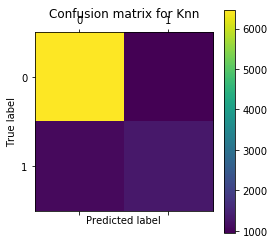

In [107]:
# display confusion matrix
K5_cm_trial1 = confusion_matrix(income_test_target, pred_Knn4)
print(K5_cm_trial1)
plt.matshow(K5_cm_trial1)
plt.title('Confusion matrix for Knn')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [108]:
#verifing Knn=5  with cross validation 
scores_neigh4 = cross_val_score(neigh4, income_train, income_train_target, cv=10,scoring ='accuracy')
print("Cross Validation Score for each K",scores_neigh4)
scores_neigh4.mean()

Cross Validation Score for each K [0.80438596 0.79692982 0.79736842 0.80078982 0.79201404 0.79596314
 0.79157525 0.80122861 0.79903466 0.78533802]


0.7964627755070328

For knn using k=5; metric='euclidean';weights='distance' with cross-validation

Range of testing accuracy is between 78.5%-80.43%. 
Our mean accuracy score is around 79.64%. 
Previous train tests split accuracy score = 79.33%.
So, we can say that this model with cross-validation is slightly(0.31) better performing than previous train tests split.

In [181]:
# 5th Model : k=5; metric='minkowski';weights='uniform'
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
neigh5 = KNeighborsClassifier(n_neighbors=5)
neigh5.fit(income_train, income_train_target) 
# make predictions
pred_Knn5 = neigh5.predict(income_test)
# summarize the fit of the model
target_names = ["high-earner= no", "high-earner=yes"]
print(accuracy_score(income_test_target,pred_Knn5))
print(confusion_matrix(income_test_target, pred_Knn5))
print(classification_report(income_test_target, pred_Knn5,target_names=target_names))

0.7987511516020064
[[6452  949]
 [1017 1351]]
                 precision    recall  f1-score   support

high-earner= no       0.86      0.87      0.87      7401
high-earner=yes       0.59      0.57      0.58      2368

      micro avg       0.80      0.80      0.80      9769
      macro avg       0.73      0.72      0.72      9769
   weighted avg       0.80      0.80      0.80      9769



Accuracy score is around 79.9% here in KNN model using knn using k=5; metric='euclidean';weights='distance'.

For class=1 (high-earner)) model achieves 59% precision and 57% recall. 

For class-0 (low-earner) model achieves 86% precision and 87% recall. 

For conclusion, model is performing okay in predicting high-earner that is 57%(but improved than previous models), whereas model is way good in predicting low-earner that is 87%. Low precision for high-earner and high precision for low-earner indicates that misclassification in high-earner class is more than low-earner which is 1017/949 in this case. 

[[6452  949]
 [1017 1351]]


Text(0.5, 0, 'Predicted label')

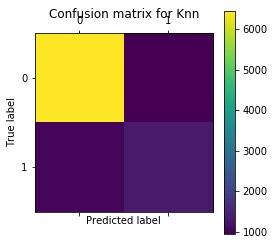

In [238]:
# display confusion matrix
K5_cm_trial2 = confusion_matrix(income_test_target, pred_Knn5)
print(K5_cm_trial2)
plt.matshow(K5_cm_trial2)
plt.title('Confusion matrix for Knn')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [239]:
#verifing Knn=5  with cross validation 
scores_neigh5 = cross_val_score(neigh5, income_train, income_train_target, cv=10,scoring ='accuracy')
print("Cross Validation Score for each K",scores_neigh5)
scores_neigh5.mean()

Cross Validation Score for each K [0.80833333 0.8004386  0.80087719 0.79991224 0.79991224 0.80298376
 0.80035103 0.81088197 0.80517771 0.78884987]


0.8017717946794866

For knn using k=5; metric='minkowski';weights='uniform' with cross-validation

Range of testing accuracy is between 78.9%-81%. 
Our mean accuracy score is around 80%. 
Previous train tests split accuracy score = 79.9%.
So, we can say that this model with cross-validation is almost(0.1) same as previous train tests split.

In [183]:
# 6th Model : k=5; metric='manhattan';weights='distance'
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
neigh6 = KNeighborsClassifier(n_neighbors=5,metric='manhattan',weights='distance')
neigh6.fit(income_train, income_train_target) 
# make predictions
pred_Knn6 = neigh6.predict(income_test)
# summarize the fit of the model
target_names = ["high-earner= no", "high-earner=yes"]
print(accuracy_score(income_test_target,pred_Knn6))
print(confusion_matrix(income_test_target, pred_Knn6))
print(classification_report(income_test_target, pred_Knn6,target_names = target_names))

0.795577848295629
[[6511  890]
 [1107 1261]]
                 precision    recall  f1-score   support

high-earner= no       0.85      0.88      0.87      7401
high-earner=yes       0.59      0.53      0.56      2368

      micro avg       0.80      0.80      0.80      9769
      macro avg       0.72      0.71      0.71      9769
   weighted avg       0.79      0.80      0.79      9769



Accuracy score is around 79.6% here in KNN model using knn using k=5; metric='euclidean';weights='distance'.

For class=1 (high-earner)) model achieves 59% precision and 53% recall. 

For class-0 (low-earner) model achieves 85% precision and 88% recall. 

Again, model is performing not so okay in predicting high-earner that is 53%, whereas model is way good in predicting low-earner that is 88%. Low precision for high-earner and high precision for low-earner indicates that misclassification in high-earner class is more than low-earner which is 1107/890 in this case. 

[[6511  890]
 [1107 1261]]


Text(0.5, 0, 'Predicted label')

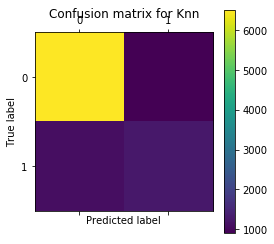

In [157]:
# displaying confusion matrix
K5_cm_trial3 = confusion_matrix(income_test_target, pred_Knn6)
#print(K5_cm_trial3)
plt.matshow(K5_cm_trial3)
plt.title('Confusion matrix for Knn')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [158]:
#verifing Knn=5 with cross validation income_train, income_train_target
scores_neigh6 = cross_val_score(neigh6, income_train, income_train_target, cv=10,scoring ='accuracy')
print("Cross Validation Score for each K",scores_neigh6)
scores_neigh6.mean()

Cross Validation Score for each K [0.80614035 0.80701754 0.80570175 0.80122861 0.79552435 0.79684072
 0.79727951 0.80254498 0.80342255 0.78841089]


0.8004111255479429

For k=5; metric='manhattan';weights='distance' with cross-validation

Range of testing accuracy is between 78.8%-80.7%. 
Our mean accuracy score is around 80%. 
Previous train tests split accuracy score = 79.6%.
So, we can say that this model with cross-validation is almost(0.4) same as previous train tests split.

#### Using GridSearchCV to find efficient parameter tuning
It allows us to define a grid of parameters that will be searched using K-fold cross-validation

In [112]:
# defining the parameter values that should be searched
k_range = list(range(1, 25))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [113]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]}


In [114]:
# instantiating the grid
knn = KNeighborsClassifier(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)

In [115]:
# fit the grid with data
X = df.ix[:,1:].values 
#X
y=df.ix[:,0].values
#y
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None,
           n_neighbors=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24],
           p=2, weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [116]:
# viewing the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']][:2]

,mean_test_score,std_test_score,params
0,0.766254,0.006798,{'n_neighbors': 1}
1,0.791468,0.005866,{'n_neighbors': 2}


In [117]:
# examining the first result
print(grid.cv_results_['params'][0])
print(grid.cv_results_['mean_test_score'][0])

{'n_neighbors': 1}
0.7662541076748257


In [118]:
# printing the array of mean scores only
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.76625411 0.79146832 0.79263536 0.80372224 0.80249378 0.80854396
 0.80713123 0.81158441 0.80900464 0.81272074 0.81275145 0.81471699
 0.81186082 0.81514695 0.81229078 0.8147477  0.81428703 0.81428703
 0.81434845 0.81545407 0.81250576 0.8152698  0.81342711 0.81302786]


Text(0, 0.5, 'Cross-Validated Accuracy')

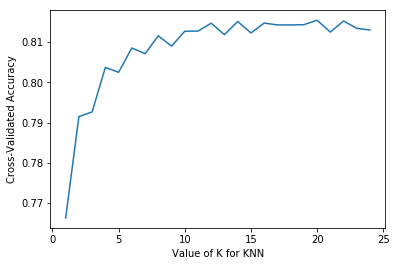

In [119]:
# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

Above plot is indicating optimale value for k is 20

In [106]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8154540708209207
{'n_neighbors': 20}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')


#### Using the best parameters to make predictions in KNN

In [184]:
# 7th Model : k=20, metric='minkowski',p=2, weights='uniform'
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')
knn.fit(income_train, income_train_target) 
# make predictions
pred_Knn = knn.predict(income_test)
# summarize the fit of the model
target_names = ["high-earner= no", "high-earner=yes"]
print(accuracy_score(income_test_target,pred_Knn))
print(classification_report(income_test_target, pred_Knn,target_names =target_names))
print(confusion_matrix(income_test_target, pred_Knn))


0.8091923431262156
                 precision    recall  f1-score   support

high-earner= no       0.85      0.90      0.88      7401
high-earner=yes       0.63      0.51      0.57      2368

      micro avg       0.81      0.81      0.81      9769
      macro avg       0.74      0.71      0.72      9769
   weighted avg       0.80      0.81      0.80      9769

[[6687  714]
 [1150 1218]]


[[6687  714]
 [1150 1218]]


Text(0.5, 0, 'Predicted label')

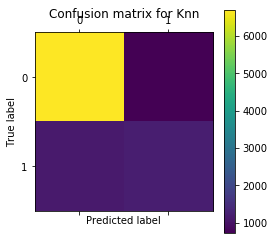

In [110]:
# display confusion matrix
Knn_cm_best = confusion_matrix(income_test_target, pred_Knn)
print(Knn_cm_best)
plt.matshow(Knn_cm_best)
plt.title('Confusion matrix for Knn')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Decision Tree Model

In [124]:
# 8th Model : 1st Decision Tree Model with all default parameters
clf_dt = tree.DecisionTreeClassifier()
clf_dt = clf_dt.fit(income_train, income_train_target)
#DT test model
pred_dt = clf_dt.predict(income_test)
print("DT Accuracy Score", accuracy_score(income_test_target, pred_dt))
# print classification report
target_names = ["high-earner= no", "high-earner=yes"]
print(classification_report(income_test_target, pred_dt, target_names=target_names))

DT Accuracy Score 0.7789947794042379
                 precision    recall  f1-score   support

high-earner= no       0.85      0.87      0.86      7401
high-earner=yes       0.55      0.51      0.53      2368

      micro avg       0.78      0.78      0.78      9769
      macro avg       0.70      0.69      0.69      9769
   weighted avg       0.77      0.78      0.78      9769



In [125]:
print("Features sorted by their score:")
print("Higher the more important")
print(sorted(zip(map(lambda x: round(x, 4), clf_dt.feature_importances_),df.columns[1:23]), 
             reverse=True))

Features sorted by their score:
Higher the more important
[(0.2427, 'age'), (0.2369, 'marital_status_Married'), (0.195, 'education_num'), (0.1402, 'hours_per_week'), (0.0249, 'occupation_Admin'), (0.0195, 'workclass_Self_Employed'), (0.0177, 'workclass_Private'), (0.017, 'workclass_Govt_class'), (0.0146, 'gender_ Female'), (0.0127, 'race_White'), (0.0111, 'occupation_Tough_jobs'), (0.0108, 'race_Black'), (0.0087, 'occupation_Services'), (0.0086, 'race_Asian-Pac-Islander'), (0.0077, 'marital_status_Divorced'), (0.0049, 'marital_status_Never-married'), (0.0026, 'race_Other'), (0.0026, 'occupation_Unknown'), (0.0025, 'race_Amer-Indian-Eskimo'), (0.0024, 'marital_status_Separated'), (0.0023, 'marital_status_Widowed'), (0.0014, 'workclass_Other_Class')]


In [126]:
# 10-fold cross-validation with 5 most important features

feature_cols = ['age','marital_status_Married','education_num','hours_per_week','occupation_Admin']
#X = df.ix[:,1:].values
X = df[feature_cols]
#X
y=df.ix[:,0].values
y
scores_rf = cross_val_score(clf_dt, X, y, cv=10)
print("Cross Validation Score for each K",scores_rf)
scores_rf.mean()


Cross Validation Score for each K [0.80012281 0.79484029 0.8009828  0.79207617 0.79883292 0.7997543
 0.81019656 0.80589681 0.80067568 0.7985258 ]


0.800190413918538

In [160]:
# 9th Model : 1st Decision Tree Model with 'information gain' & max_features=6
clf_dt2 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3,max_features=6)
clf_dt2 = clf_dt2.fit(income_train, income_train_target)
#DT test model
pred_dt2 = clf_dt2.predict(income_test)
print("DT Accuracy Score", accuracy_score(income_test_target, pred_dt2))
# print classification report
target_names = ["high-earner= no", "high-earner=yes"]
print(classification_report(income_test_target, pred_dt2, target_names=target_names))

DT Accuracy Score 0.7692701402395332
                 precision    recall  f1-score   support

high-earner= no       0.87      0.82      0.84      7401
high-earner=yes       0.52      0.61      0.56      2368

      micro avg       0.77      0.77      0.77      9769
      macro avg       0.69      0.72      0.70      9769
   weighted avg       0.78      0.77      0.78      9769



In [161]:
scores_dt2 = cross_val_score(clf_dt2, income_train, income_train_target, cv=10)
print("Cross Validation Score for each K",scores_dt2)
scores_dt2.mean()

Cross Validation Score for each K [0.76666667 0.78903509 0.75964912 0.78279947 0.78411584 0.81702501
 0.75998245 0.81526986 0.81658622 0.81079895]


0.7901928674010202

In [162]:
from IPython.display import Image
dot_data = tree.export_graphviz(clf_dt2, out_file=None, 
                         filled=True, rounded=True,  
                         special_characters=True)

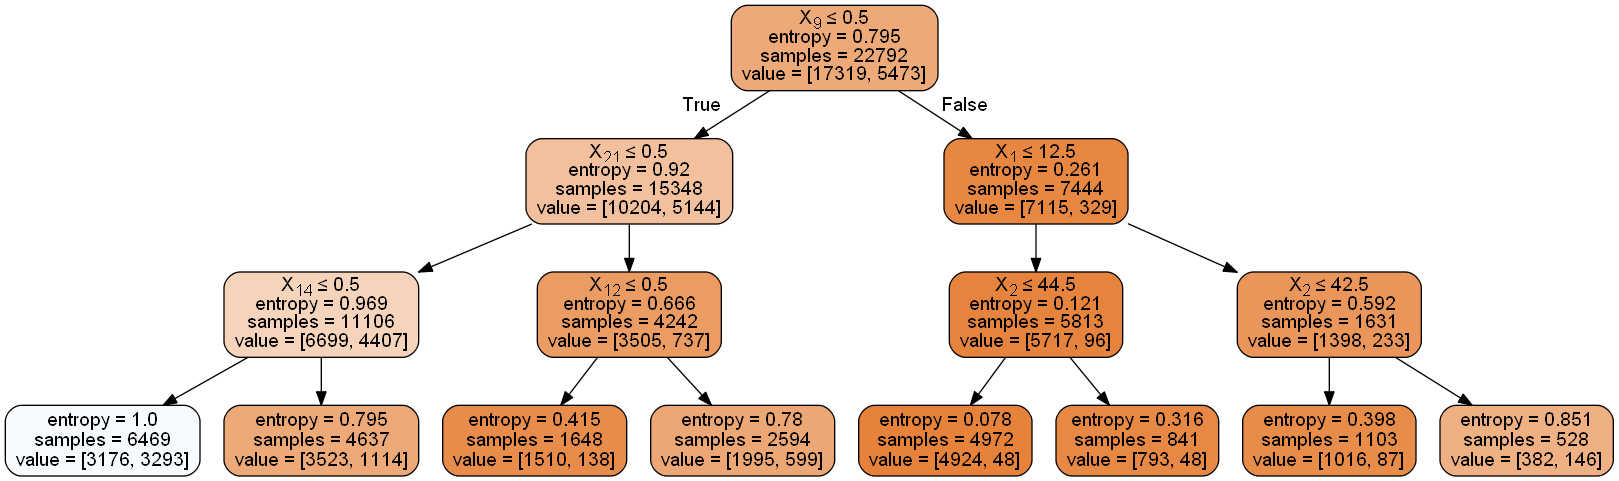

In [163]:
import pydotplus 
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

#### Using GridSearchCV to find efficient parameter tuning for Decision Tree

In [162]:
# Tuning parameters
tree_para = {'criterion':['gini','entropy'],'max_depth':[3,4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],'max_features': [ 5,6]}
# Running grid search 
clf_grid = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
clf_grid.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90, 120, 150], 'max_features': [5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [163]:
# examine the best model
print(clf_grid.best_score_)
print(clf_grid.best_params_)
print(clf_grid.best_estimator_)

0.8242990080157243
{'criterion': 'gini', 'max_depth': 9, 'max_features': 6}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


#### Using the best estimators in make predictions in Decision Tree Model

In [200]:
# 10th Model: Decision Tree with best parameters
clf_DTbest = tree.DecisionTreeClassifier(criterion='gini', max_depth=9,
            max_features=6)
clf_DTbest = clf_DTbest.fit(income_train, income_train_target)
# Deccision Tree test model
pred_dt = clf_DTbest.predict(income_test)
# summarize the fit of the model
target_names = ["high-earner = no", "high-earner = yes"]
print("DT Accuracy Score", accuracy_score(income_test_target, pred_dt))
print(classification_report(income_test_target, pred_dt, target_names=target_names))

DT Accuracy Score 0.8186098884225612
                   precision    recall  f1-score   support

 high-earner = no       0.86      0.91      0.88      7401
high-earner = yes       0.65      0.54      0.59      2368

        micro avg       0.82      0.82      0.82      9769
        macro avg       0.76      0.72      0.74      9769
     weighted avg       0.81      0.82      0.81      9769



[[6711  690]
 [1083 1285]]


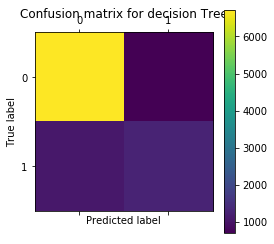

In [138]:
# displaying confusion matrix
DtBest_cm = confusion_matrix(income_test_target, pred_dt)
plt.matshow(DtBest_cm)
plt.title('Confusion matrix for decision Tree')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print(DtBest_cm)

Above tree with maximum depth=9 and max_features = 6

 ### Random Forest

In [109]:
# 11th Model : Training 1st Random Forest  using only one processor
rf = RandomForestClassifier(n_estimators= 500, n_jobs=1,oob_score=True,max_features='auto')
rf.fit(income_train, income_train_target)
# test random forest model
pred_rf = rf.predict(income_test)
# summarize the fit of the model
target_names = ["high-earner = no", "high-earner = yes"]
print(accuracy_score(income_test_target, pred_rf))
print(classification_report(income_test_target, pred_rf, target_names=target_names))
start_time = time.clock()
print("Time to run", time.clock() - start_time, "seconds")

0.8053024874603337
                   precision    recall  f1-score   support

 high-earner = no       0.86      0.89      0.87      7401
high-earner = yes       0.61      0.55      0.58      2368

        micro avg       0.81      0.81      0.81      9769
        macro avg       0.73      0.72      0.72      9769
     weighted avg       0.80      0.81      0.80      9769

Time to run 3.843499962385977e-05 seconds


In [110]:
#verifing 1st Random Forest with 10-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn import metrics
scores_rf = cross_val_score(rf, income_train, income_train_target, cv=10)
print("Cross Validation Score for each K",scores_rf)
scores_rf.mean()

Cross Validation Score for each K [0.80789474 0.81842105 0.8122807  0.81000439 0.8056165  0.81044318
 0.81834138 0.82711716 0.81878017 0.79850746]


0.8127406718284975

[[6574  827]
 [1093 1275]]


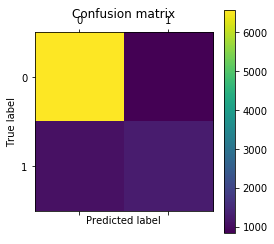

In [111]:
# displaying confusion matrix
rf1_cm = confusion_matrix(income_test_target, pred_rf)
plt.matshow(rf1_cm)
plt.title('Confusion matrix for Random Forest')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
#print(rf1_cm)

In [168]:
# 11th Model : Training 2nd Random forest with all defaults
rf2 = RandomForestClassifier()
rf2.fit(income_train, income_train_target)
pred_rf2 = rf2.predict(income_test)
# summarize the fit of the model
target_names = ["high-earner = no", "high-earner = yes"]
print(accuracy_score(income_test_target, pred_rf2))
print(classification_report(income_test_target, pred_rf2, target_names=target_names))
start_time = time.clock()
print("Time to run", time.clock() - start_time, "seconds")
print("Features sorted by their score:")
print("Higher the more important")
print(sorted(zip(map(lambda x: round(x, 4), rf2.feature_importances_),df.columns[1:23]), 
             reverse=True))

0.7962944006551336
                   precision    recall  f1-score   support

 high-earner = no       0.85      0.89      0.87      7401
high-earner = yes       0.59      0.51      0.55      2368

        micro avg       0.80      0.80      0.80      9769
        macro avg       0.72      0.70      0.71      9769
     weighted avg       0.79      0.80      0.79      9769

Time to run 3.420399661990814e-05 seconds
Features sorted by their score:
Higher the more important
[(0.3221, 'age'), (0.1689, 'marital_status_Married'), (0.1688, 'hours_per_week'), (0.1599, 'education_num'), (0.0358, 'occupation_Admin'), (0.027, 'marital_status_Never-married'), (0.0257, 'occupation_Tough_jobs'), (0.0139, 'gender_ Female'), (0.0083, 'marital_status_Divorced'), (0.008, 'workclass_Govt_class'), (0.0074, 'workclass_Private'), (0.0072, 'race_White'), (0.007, 'workclass_Self_Employed'), (0.0058, 'race_Black'), (0.0051, 'occupation_Services'), (0.0044, 'workclass_Other_Class'), (0.0042, 'race_Asian-Pac-Isl

In [130]:
# Now, 10-fold cross-validation with 4 most important features

feature_cols = ['age','education_num','hours_per_week','marital_status_Married']
#X = df.ix[:,1:].values
X = df[feature_cols]
#X
y=df.ix[:,0].values
y
scores_rf2 = cross_val_score(rf2, X, y, cv=10)
print("Cross Validation Score for each K",scores_rf2)
scores_rf2.mean()



Cross Validation Score for each K [0.79950875 0.79146192 0.80712531 0.79269042 0.79944717 0.80958231
 0.81050369 0.80804668 0.81173219 0.80589681]


0.8035995236870275

#### Using GridSearchCV to find efficient parameter tuning for RandomForest Model

In [186]:
# Preparing parameters grid 
param_grid = { 
    'n_estimators': [200, 500, 700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'n_jobs':[-1,1,2,3,4]
}

In [187]:
# Running grid-search
CV_rfc = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv= 10)

In [189]:
# fitting the model
#CV_rfc.fit(X, y)


Best parameters using gridsearch:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=4,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

#### Using the best estimators in make predictions in Random Forest Model

In [172]:
# 12th Model :  Training random forest with best estimators
#paralleized to 4 cores 
rf_best = RandomForestClassifier(n_estimators= 700,n_jobs=4,oob_score=True, max_features = 'auto')
rf_best.fit(income_train, income_train_target)
# test random forest model
pred_rf_best = rf_best.predict(income_test)
# summarize the fit model
print(accuracy_score(income_test_target, pred_rf_best))
target_names = ["high-earner = no", "high-earner = yes"]
print(classification_report(income_test_target, pred_rf_best, target_names=target_names))
start_time = time.clock()
print("Time to run", time.clock() - start_time, "seconds")

0.8036646534957519
                   precision    recall  f1-score   support

 high-earner = no       0.86      0.89      0.87      7401
high-earner = yes       0.61      0.54      0.57      2368

        micro avg       0.80      0.80      0.80      9769
        macro avg       0.73      0.72      0.72      9769
     weighted avg       0.80      0.80      0.80      9769

Time to run 4.8309000703739e-05 seconds


ROC AUC: 0.715


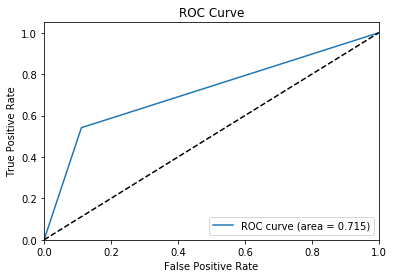

In [142]:
# Determine the false positive and true positive rates
from sklearn.metrics import roc_curve, auc


fpr, tpr, _ = roc_curve(income_test_target, pred_rf-best) 
    
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.3f' % roc_auc)
# here AUC is around 72% 
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Bagging Classifier

In [250]:
# 13th Model : Bagging Classifer -1
from sklearn.ensemble import BaggingClassifier
clf_bag = BaggingClassifier(n_estimators=100, random_state=7)

clf_bag.fit(income_train, income_train_target)
predicted_bag=clf_bag.predict(income_test)
expected = income_test_target
target_names = ["high-earner = no", "high-earner = yes"]
print("Bagging Accuracy", accuracy_score(expected,predicted_bag ))
print(classification_report(expected, predicted_bag,target_names=target_names))
print(confusion_matrix(expected, predicted_bag))

Bagging Accuracy 0.8040741119868974
                   precision    recall  f1-score   support

 high-earner = no       0.86      0.88      0.87      7401
high-earner = yes       0.60      0.55      0.58      2368

        micro avg       0.80      0.80      0.80      9769
        macro avg       0.73      0.72      0.73      9769
     weighted avg       0.80      0.80      0.80      9769

[[6544  857]
 [1057 1311]]


[[6544  857]
 [1057 1311]]


Text(0.5, 0, 'Predicted label')

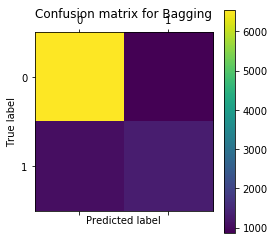

In [251]:
# displaying confusion matrix
bag_cm = confusion_matrix(income_test_target, predicted_bag)
print(bag_cm)
plt.matshow(bag_cm)
plt.title('Confusion matrix for Bagging')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [172]:
#verifing bagging classifier-1 with cross validation 
scores_bag = cross_val_score(clf_bag, income_train, income_train_target, cv=10,scoring ='accuracy')
print("Cross Validation Score for each K",scores_bag)
scores_bag.mean()

Cross Validation Score for each K [0.77412281 0.78333333 0.77938596 0.77885037 0.77928916 0.77753401
 0.77577885 0.77928916 0.78148311 0.78138718]


0.7790453946940095

In [174]:
# 14th Model : Bagging Classifer -2
from sklearn.ensemble import BaggingClassifier
clf_bag2 = BaggingClassifier(n_estimators=500,n_jobs=-1, random_state=7,max_features=0.5)
#print(clf_bag2)
clf_bag2.fit(income_train, income_train_target)
predicted_bag2=clf_bag2.predict(income_test)
expected = income_test_target
target_names = ["high-earner = no", "high-earner = yes"]
print("Bagging Accuracy", accuracy_score(expected,predicted_bag2))
print(classification_report(expected, predicted_bag2,target_names=target_names))
print(confusion_matrix(expected, predicted_bag2))

Bagging Accuracy 0.8232162964479476
                   precision    recall  f1-score   support

 high-earner = no       0.84      0.94      0.89      7401
high-earner = yes       0.71      0.45      0.55      2368

        micro avg       0.82      0.82      0.82      9769
        macro avg       0.78      0.70      0.72      9769
     weighted avg       0.81      0.82      0.81      9769

[[6976  425]
 [1302 1066]]


In [175]:
#verifing bagging classifier-2 with cross validation
scores_bag2 = cross_val_score(clf_bag2, income_train, income_train_target, cv=10,scoring ='accuracy')
print("Cross Validation Score for each K",scores_bag2)
scores_bag2.mean()

Cross Validation Score for each K [0.81842105 0.82763158 0.82807018 0.83238262 0.82711716 0.82887231
 0.82053532 0.825362   0.83808688 0.82045654]


0.8266935644464155

Range of testing accuracy is between 81.8%-83.2%  
Our mean accuracy score is around 83%. 
Previous train tests split accuracy score = 82%.
So, we can say that this model with cross-validation is slightly(1.0) better performing than previous train tests split.

In [177]:
# 15th Model : Bagging Classifer -3
from sklearn.ensemble import BaggingClassifier
clf_bag3 = BaggingClassifier(n_estimators=500,n_jobs=-1, random_state=7,max_features=5)

clf_bag3.fit(income_train, income_train_target)
predicted_bag3=clf_bag3.predict(income_test)
expected = income_test_target
target_names = ["high-earner = no", "high-earner = yes"]
print("Bagging Accuracy", accuracy_score(expected,predicted_bag3))
print(classification_report(expected, predicted_bag3,target_names=target_names))
print(confusion_matrix(expected, predicted_bag3))

Bagging Accuracy 0.7760262053434334
                   precision    recall  f1-score   support

 high-earner = no       0.77      0.99      0.87      7401
high-earner = yes       0.84      0.09      0.17      2368

        micro avg       0.78      0.78      0.78      9769
        macro avg       0.81      0.54      0.52      9769
     weighted avg       0.79      0.78      0.70      9769

[[7360   41]
 [2147  221]]


In [178]:
#verifing bagging classifier with cross validation income_train, income_train_target
scores_bag3 = cross_val_score(clf_bag3, income_train, income_train_target, cv=10,scoring ='accuracy')
print("Cross Validation Score for each K",scores_bag3)
scores_bag3.mean()

Cross Validation Score for each K [0.77412281 0.78333333 0.77938596 0.77885037 0.77928916 0.77753401
 0.77577885 0.77928916 0.78148311 0.78138718]


0.7790453946940095

### Extra Trees Classifier

In [252]:
# 16th Model : Extra Trees Classifier-1
from sklearn.ensemble import ExtraTreesClassifier
xtc = ExtraTreesClassifier(max_depth=3,
                         n_estimators=10,n_jobs=1,class_weight='balanced')
xtc.fit(income_train, income_train_target)
predicted_xtc=xtc.predict(income_test)
expected = income_test_target
target_names = ["high-earner = no", "high-earner = yes"]
print("Extra Trees", accuracy_score(expected,predicted_xtc))
print(classification_report(expected, predicted_xtc,target_names=target_names))
print(confusion_matrix(expected, predicted_xtc))

Extra Trees 0.7184972873374962
                   precision    recall  f1-score   support

 high-earner = no       0.93      0.68      0.79      7401
high-earner = yes       0.46      0.84      0.59      2368

        micro avg       0.72      0.72      0.72      9769
        macro avg       0.69      0.76      0.69      9769
     weighted avg       0.81      0.72      0.74      9769

[[5040 2361]
 [ 389 1979]]


[[5040 2361]
 [ 389 1979]]


Text(0.5, 0, 'Predicted label')

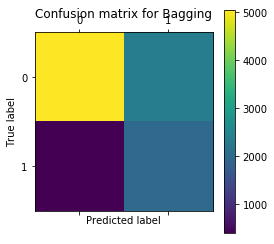

In [253]:
# displaying confusion matrix
xtc_cm = confusion_matrix(income_test_target, predicted_xtc)
print(xtc_cm)
plt.matshow(xtc_cm)
plt.title('Confusion matrix for Bagging')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [180]:
#verifing Extra Trees Classifier-1 with 10-fold cross validation 
scores_xtc = cross_val_score(xdt, income_train, income_train_target, cv=10,scoring ='accuracy')
print("Cross Validation Score for each K",scores_xtc)
scores_xtc.mean()

Cross Validation Score for each K [0.7004386  0.72236842 0.7627193  0.72312418 0.68319438 0.73058359
 0.71215445 0.74945151 0.73189996 0.71334504]


0.7229279429014357

Range of testing accuracy is between 68%-76%  which depicts variation
Our mean accuracy score is around 72.29%. 
Previous train tests split accuracy score = 71.84%.
So, we can say that this model with cross-validation is slightly(0.45) better performing than previous train tests split.

In [182]:
# 17th Model : Extra Trees Classifier-2
from sklearn.ensemble import ExtraTreesClassifier
xtc2 = ExtraTreesClassifier(max_depth=3,
                         n_estimators=100,n_jobs=-1,class_weight='balanced')
xtc2.fit(income_train, income_train_target)
predicted_xtc2=xtc2.predict(income_test)
expected = income_test_target
target_names = ["high-earner = no", "high-earner = yes"]
print("Extra Trees", accuracy_score(expected,predicted_xtc2))
print(classification_report(expected, predicted_xtc2,target_names=target_names))
print(confusion_matrix(expected, predicted_xtc2))

Extra Trees 0.7050875217524823
                   precision    recall  f1-score   support

 high-earner = no       0.94      0.66      0.77      7401
high-earner = yes       0.44      0.86      0.59      2368

        micro avg       0.71      0.71      0.71      9769
        macro avg       0.69      0.76      0.68      9769
     weighted avg       0.82      0.71      0.73      9769

[[4853 2548]
 [ 333 2035]]


In [183]:
#verifing Extra Trees Classifier-2 with 10-fold cross validation
scores_xtc2 = cross_val_score(xtc2, income_train, income_train_target, cv=10,scoring ='accuracy')
print("Cross Validation Score for each K",scores_xtc2)
scores_xtc2.mean()

Cross Validation Score for each K [0.7127193  0.71578947 0.7122807  0.71873629 0.69591926 0.71390961
 0.71654234 0.71522598 0.71083809 0.71817384]


0.7130134876859595

In [179]:
# 18th Model : Extra Trees Classifier-3
from sklearn.ensemble import ExtraTreesClassifier
xtc2 = ExtraTreesClassifier(max_depth=2,
                         n_estimators=200,n_jobs=-1,class_weight='balanced')
xtc2.fit(income_train, income_train_target)
predicted_xtc2=xtc2.predict(income_test)
expected = income_test_target
target_names = ["high-earner = no", "high-earner = yes"]
print("Extra Trees", accuracy_score(expected,predicted_xtc2))
print(classification_report(expected, predicted_xtc2,target_names=target_names))
print(confusion_matrix(expected, predicted_xtc2))

Extra Trees 0.7066229910942778
                   precision    recall  f1-score   support

 high-earner = no       0.93      0.66      0.77      7401
high-earner = yes       0.44      0.85      0.58      2368

        micro avg       0.71      0.71      0.71      9769
        macro avg       0.69      0.75      0.68      9769
     weighted avg       0.81      0.71      0.73      9769

[[4901 2500]
 [ 366 2002]]


### Gradient Boosting Classification

In [157]:
# 19th Model : Gradient Boosting classifier-1
from sklearn.ensemble import GradientBoostingClassifier
clf_GBC = GradientBoostingClassifier(n_estimators=200, learning_rate=0.01, max_depth=3, random_state=1)
clf_GBC.fit(income_train, income_train_target)
predicted_GBC=clf_GBC.predict(income_test)
expected = income_test_target
target_names = ["high-earner = no", "high-earner = yes"]
print("Gradient Boost Accuracy", accuracy_score(expected,predicted_GBC))
print(classification_report(expected, predicted_GBC,target_names=target_names))
print(confusion_matrix(expected, predicted_GBC))
# when max_depth = 1, my recall & precision were 0.00 for yes class but setting max_depth = 3 changed the result

Gradient Boost Accuracy 0.8251612242808886
                   precision    recall  f1-score   support

 high-earner = no       0.85      0.94      0.89      7401
high-earner = yes       0.71      0.47      0.56      2368

        micro avg       0.83      0.83      0.83      9769
        macro avg       0.78      0.70      0.73      9769
     weighted avg       0.81      0.83      0.81      9769

[[6956  445]
 [1263 1105]]


In [184]:
#verifing Gradient Boosting classifier-1 with 10-fold cross validation
scores_GBC = cross_val_score(clf_GBC, income_train, income_train_target, cv=10,scoring ='accuracy')
print("Cross Validation Score for each K",scores_GBC)
scores_GBC.mean()

Cross Validation Score for each K [0.83464912 0.83289474 0.83640351 0.83369899 0.82974989 0.83984204
 0.8372093  0.83764809 0.84335235 0.82967515]


0.8355123180248013

In [185]:
# 20th Model : Gradient Boosting classifier-2
from sklearn.ensemble import GradientBoostingClassifier
clf_GBC2 = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=2, random_state=1)
clf_GBC2.fit(income_train, income_train_target)
predicted_GBC2=clf_GBC2.predict(income_test)
expected = income_test_target
target_names = ["high-earner = no", "high-earner = yes"]
print("Gradient Boost Accuracy", accuracy_score(expected,predicted_GBC2))
print(classification_report(expected, predicted_GBC2,target_names=target_names))
print(confusion_matrix(expected, predicted_GBC2))

Gradient Boost Accuracy 0.8267990582454704
                   precision    recall  f1-score   support

 high-earner = no       0.86      0.91      0.89      7401
high-earner = yes       0.67      0.55      0.61      2368

        micro avg       0.83      0.83      0.83      9769
        macro avg       0.77      0.73      0.75      9769
     weighted avg       0.82      0.83      0.82      9769

[[6770  631]
 [1061 1307]]


In [186]:
#verifing Gradient Boosting classifier-2 with 10-fold cross validation
scores_GBC2 = cross_val_score(clf_GBC2, income_train, income_train_target, cv=10,scoring ='accuracy')
print("Cross Validation Score for each K",scores_GBC2)
scores_GBC2.mean()

Cross Validation Score for each K [0.83464912 0.83289474 0.83640351 0.83369899 0.82974989 0.83984204
 0.8372093  0.83764809 0.84335235 0.82967515]


0.8355123180248013

[[7041  360]
 [1398  970]]


Text(0.5, 0, 'Predicted label')

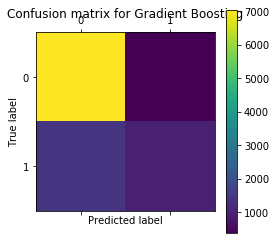

In [254]:
# displaying confusion matrix
gbc2_cm = confusion_matrix(income_test_target,predicted_GBC2)
print(gbc2_cm)
plt.matshow(gbc2_cm)
plt.title('Confusion matrix for Gradient Boosting')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [148]:
# 21st Model : Gradient Boosting classifier-3
from sklearn.ensemble import GradientBoostingClassifier
clf_GBC3 = GradientBoostingClassifier(n_estimators=500, learning_rate=0.01, max_depth=1, random_state=1)
clf_GBC3.fit(income_train, income_train_target)
predicted_GBC3=clf_GBC3.predict(income_test)
expected = income_test_target
target_names = ["high-earner = no", "high-earner = yes"]
print("Gradient Boost Accuracy", accuracy_score(expected,predicted_GBC3))
print(classification_report(expected, predicted_GBC3,target_names=target_names))
print(confusion_matrix(expected, predicted_GBC3))

Gradient Boost Accuracy 0.8200429931415703
                   precision    recall  f1-score   support

 high-earner = no       0.83      0.95      0.89      7401
high-earner = yes       0.73      0.41      0.52      2368

        micro avg       0.82      0.82      0.82      9769
        macro avg       0.78      0.68      0.71      9769
     weighted avg       0.81      0.82      0.80      9769

[[7041  360]
 [1398  970]]


### AdaBoost Classifier

In [187]:
# 22nd Model : Adaboost Classifier-1
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                         algorithm="SAMME",
                         n_estimators=200)
bdt.fit(income_train, income_train_target)
predicted_bdt=bdt.predict(income_test)
expected = income_test_target
target_names = ["high-earner = no", "high-earner = yes"]
print("Adaboost Accuracy", accuracy_score(expected,predicted_bdt))
print(classification_report(expected, predicted_bdt,target_names=target_names))
print(confusion_matrix(expected, predicted_bdt))

Adaboost Accuracy 0.8249564950353158
                   precision    recall  f1-score   support

 high-earner = no       0.87      0.90      0.89      7401
high-earner = yes       0.66      0.58      0.62      2368

        micro avg       0.82      0.82      0.82      9769
        macro avg       0.76      0.74      0.75      9769
     weighted avg       0.82      0.82      0.82      9769

[[6682  719]
 [ 991 1377]]


In [189]:
#verifing Adaboost Classifier-1 with 10-fold cross validation
scores_bdt = cross_val_score(bdt, income_train, income_train_target, cv=10,scoring ='accuracy')
print("Cross Validation Score for each K",scores_bdt)
scores_bdt.mean()

Cross Validation Score for each K [0.83289474 0.82894737 0.83114035 0.83896446 0.83062747 0.8372093
 0.82623958 0.83589294 0.84598508 0.82396839]


0.8331869673513467

In [247]:
# 23rd Model : Adaboost Classifier-2
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
bdt2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                         algorithm="SAMME.R",
                         n_estimators=100,learning_rate=0.1)
bdt2.fit(income_train, income_train_target)
predicted_bdt2=bdt2.predict(income_test)
expected = income_test_target
target_names = ["high-earner = no", "high-earner = yes"]
print("Adaboost Accuracy", accuracy_score(expected,predicted_bdt2))
print(classification_report(expected, predicted_bdt2,target_names=target_names))
print(confusion_matrix(expected, predicted_bdt2))

Adaboost Accuracy 0.8297676323062749
                   precision    recall  f1-score   support

 high-earner = no       0.86      0.92      0.89      7401
high-earner = yes       0.69      0.55      0.61      2368

        micro avg       0.83      0.83      0.83      9769
        macro avg       0.78      0.73      0.75      9769
     weighted avg       0.82      0.83      0.82      9769

[[6815  586]
 [1077 1291]]


In [198]:
#verifing Adaboost Classifier-2 with 10-fold cross validation 
scores_bdt2 = cross_val_score(bdt2, income_train, income_train_target, cv=10,scoring ='accuracy')
print("Cross Validation Score for each K",scores_bdt2)
scores_bdt2.mean()

Cross Validation Score for each K [0.83596491 0.83201754 0.83114035 0.83369899 0.83106626 0.84203598
 0.83764809 0.84028082 0.84335235 0.83318701]


0.836039230548448

Range of testing accuracy is between 83.1%-84.3%  
Our mean accuracy score is around 84%. 
Previous train tests split accuracy score = 83%.
So, we can say that this model with cross-validation is slightly(1.0) better performing than previous train tests split. 

[[6815  586]
 [1077 1291]]


Text(0.5, 0, 'Predicted label')

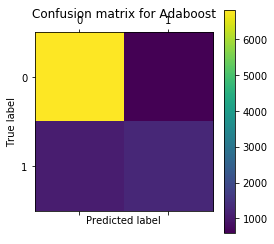

In [249]:
# displaying confusion matrix
bdt2_cm = confusion_matrix(income_test_target, predicted_bdt2)
print(bdt2_cm)
plt.matshow(bdt2_cm)
plt.title('Confusion matrix for Adaboost')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [149]:
# 24th Model : Adaboost Classifier-3
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
bdt3 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                         algorithm="SAMME.R",
                         n_estimators=300,learning_rate=0.01)
bdt3.fit(income_train, income_train_target)
predicted_bdt3=bdt3.predict(income_test)
expected = income_test_target
target_names = ["high-earner = no", "high-earner = yes"]
print("Adaboost Accuracy", accuracy_score(expected,predicted_bdt3))
print(classification_report(expected, predicted_bdt3,target_names=target_names))
print(confusion_matrix(expected, predicted_bdt3))

Adaboost Accuracy 0.8254683181492476
                   precision    recall  f1-score   support

 high-earner = no       0.85      0.94      0.89      7401
high-earner = yes       0.71      0.48      0.57      2368

        micro avg       0.83      0.83      0.83      9769
        macro avg       0.78      0.71      0.73      9769
     weighted avg       0.81      0.83      0.81      9769

[[6926  475]
 [1230 1138]]


In [210]:
# 25th Model : bagging with 5 classifiers
# Get some classifiers to evaluate
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
seed = 1075
np.random.seed(seed)
# Five classifiers
rf = RandomForestClassifier()
etc = ExtraTreesClassifier()
knn = KNeighborsClassifier()
svc = SVC()
bdt = AdaBoostClassifier()
clf_array = [rf, etc, knn, svc, bdt]
for clf in clf_array:
    vanilla_scores = cross_val_score(clf, X, y, cv=10, n_jobs=-1)
    bagging_clf = BaggingClassifier(clf, 
       max_samples=0.4, max_features=10, random_state=seed)
    bagging_scores = cross_val_score(bagging_clf, X, y, cv=10, 
       n_jobs=-1)
    
    print("Mean of:{1:.3f}, std: (+/-) {2:.3f} [{0}]".format(clf.__class__.__name__,vanilla_scores.mean(), vanilla_scores.std()))
    print("Mean of:{1:.3f},std: (+/-) {2:.3f} [Bagging {0}]\n".format(clf.__class__.__name__,bagging_scores.mean(), bagging_scores.std()))

Mean of:0.806, std: (+/-) 0.006 [RandomForestClassifier]
Mean of:0.824,std: (+/-) 0.006 [Bagging RandomForestClassifier]

Mean of:0.802, std: (+/-) 0.008 [ExtraTreesClassifier]
Mean of:0.823,std: (+/-) 0.006 [Bagging ExtraTreesClassifier]

Mean of:0.802, std: (+/-) 0.007 [KNeighborsClassifier]
Mean of:0.819,std: (+/-) 0.005 [Bagging KNeighborsClassifier]

Mean of:0.826, std: (+/-) 0.005 [SVC]
Mean of:0.819,std: (+/-) 0.005 [Bagging SVC]

Mean of:0.829, std: (+/-) 0.005 [AdaBoostClassifier]
Mean of:0.823,std: (+/-) 0.006 [Bagging AdaBoostClassifier]



### Stacking

In [180]:
# 26th Model : Voting Classifier 
# using hard-voting
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# Four Models RF, KNN, BDT, ETC
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
bdt = AdaBoostClassifier()
etc = ExtraTreesClassifier()
eclf2 = VotingClassifier(estimators=[('rf', rf), ('knn', knn), ('bdt', bdt),('etc', etc)],
                         voting='hard')
for MV, label in zip([rf, knn, bdt, etc,eclf2], ['Random Forest', 'KNN', 'AdaBoost',
                                                 'Extra Trees' ,'Ensemble']):

    scores2 = cross_val_score(MV, income_train, income_train_target, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores2.mean(), scores2.std(), label))

Accuracy: 0.81 (+/- 0.00) [Random Forest]
Accuracy: 0.80 (+/- 0.00) [KNN]
Accuracy: 0.83 (+/- 0.00) [AdaBoost]
Accuracy: 0.80 (+/- 0.00) [Extra Trees]
Accuracy: 0.82 (+/- 0.00) [Ensemble]


### Artificial Neural Network (ANN)
Scaling the data first, next tuned parameters for activation,alpha, hidden layer, solvertolerance value and maximum iteration   

In [209]:
# scaling before running ANN models
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler.fit(income_train)  
# applying transformation
scaler.transform(income_train)
# applying same transformation to test data
scaler.transform(income_test) 

array([[-0.99400255, -0.41743765, -0.03512657, ...,  0.41647827,
        -0.70443261,  0.70443261],
       [-0.33523082, -0.41743765,  0.36893354, ...,  0.41647827,
        -0.70443261,  0.70443261],
       [ 0.25034405,  1.14208189,  0.61136961, ...,  0.41647827,
        -0.70443261,  0.70443261],
       ...,
       [ 0.25034405, -0.02755776,  0.93461769, ...,  0.41647827,
        -0.70443261,  0.70443261],
       [-1.4331837 , -0.41743765, -0.03512657, ..., -2.40108564,
         1.41958221, -1.41958221],
       [-0.70121511,  0.75220201, -0.03512657, ...,  0.41647827,
         1.41958221, -1.41958221]])

In [215]:
# 27th Model : Multi-layer Perceptron classifier-1
from sklearn.neural_network import MLPClassifier
clf_NN = MLPClassifier(activation='relu', alpha=1e-05, 
       hidden_layer_sizes=(15, 5), max_iter=700, random_state=1, 
       solver='lbfgs', tol=0.0001, verbose=False)
clf_NN.fit(income_train, income_train_target)
# test random forest model
pred_NN = clf_NN.predict(income_test)
print("ANN Accuracy", accuracy_score(income_test_target, pred_NN))
target_names = ["high-earner = no", "high-earner = yes"]
print(classification_report(income_test_target, pred_NN, target_names=target_names))
print(confusion_matrix(income_test_target, pred_NN))

ANN Accuracy 0.8228068379568021
                   precision    recall  f1-score   support

 high-earner = no       0.86      0.92      0.89      7401
high-earner = yes       0.67      0.52      0.59      2368

        micro avg       0.82      0.82      0.82      9769
        macro avg       0.77      0.72      0.74      9769
     weighted avg       0.81      0.82      0.81      9769

[[6796  605]
 [1126 1242]]


[[6749  652]
 [1097 1271]]


Text(0.5, 0, 'Predicted label')

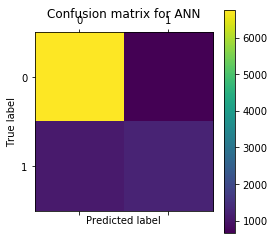

In [192]:
# displaying confusion matrix
ANN_cm = confusion_matrix(income_test_target, pred_NN)
print(ANN_cm)
plt.matshow(ANN_cm)
plt.title('Confusion matrix for ANN')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [193]:
#verifing ANN Classifier-1 with 10-fold cross validation 
scores_ANN = cross_val_score(clf_NN, income_train, income_train_target, cv=10,scoring ='accuracy')
print("Cross Validation Score for each K",scores_ANN)
scores_ANN.mean()

Cross Validation Score for each K [0.82719298 0.82324561 0.82763158 0.82667837 0.82843352 0.83194384
 0.83413778 0.82711716 0.83896446 0.82879719]


0.8294142486623552

Range of testing accuracy is between 82.3%-83.1%  
Our mean accuracy score is around 83%. 
Previous train tests split accuracy score = 82%.
So, we can say that this model with cross-validation is slightly(1.0) better performing than previous train tests split. 

In [212]:
# 28th Model : Multi-layer Perceptron classifier-2
from sklearn.neural_network import MLPClassifier
clf_NN2 = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=200,
        random_state=1, solver='adam', verbose=False)
clf_NN2.fit(income_train, income_train_target)
# test random forest model
pred_NN2 = clf_NN2.predict(income_test)
print("Accuracy", accuracy_score(income_test_target, pred_NN2))
target_names = ["high-earner = no", "high-earner = yes"]
print(classification_report(income_test_target, pred_NN2, target_names=target_names))
print(confusion_matrix(income_test_target, pred_NN2))

Accuracy 0.8223973794656567
                   precision    recall  f1-score   support

 high-earner = no       0.86      0.92      0.89      7401
high-earner = yes       0.67      0.53      0.59      2368

        micro avg       0.82      0.82      0.82      9769
        macro avg       0.76      0.72      0.74      9769
     weighted avg       0.81      0.82      0.81      9769

[[6785  616]
 [1119 1249]]


In [196]:
# 29th Model : Multi-layer Perceptron classifier-3
from sklearn.neural_network import MLPClassifier
# the optimal number of hidden nodes in the first hidden layer is: sqrt[(m+2)N] + 2sqrt[N/(m+2)] =25
# and in the second hidden layer, the optimal number of hidden nodes is: m*sqrt[N/(m+2)]=8, where 
# N = number of inputs, and m = number of outputs.
clf_NN3 =MLPClassifier(activation='tanh',batch_size='auto',
       hidden_layer_sizes=(25,8),random_state=1, 
       solver='lbfgs', verbose=False)
       
clf_NN3.fit(income_train, income_train_target)
# test random forest model
pred_NN3 = clf_NN3.predict(income_test)
print("Accuracy", accuracy_score(income_test_target, pred_NN3))
target_names = ["high-earner = no", "high-earner = yes"]
print(classification_report(income_test_target, pred_NN3, target_names=target_names))
print(confusion_matrix(income_test_target, pred_NN3))

Accuracy 0.8166649605896202
                   precision    recall  f1-score   support

 high-earner = no       0.87      0.89      0.88      7401
high-earner = yes       0.63      0.58      0.61      2368

        micro avg       0.82      0.82      0.82      9769
        macro avg       0.75      0.74      0.74      9769
     weighted avg       0.81      0.82      0.81      9769

[[6603  798]
 [ 993 1375]]


In [246]:
#verifing ANN Classifier-3 with 10-fold cross validation 
scores_ANN3 = cross_val_score(clf_NN3, income_train, income_train_target, cv=10,scoring ='accuracy')
print("Cross Validation Score for each K",scores_ANN3)
scores_ANN3.mean()

Cross Validation Score for each K [0.82807018 0.82631579 0.82631579 0.81439228 0.82667837 0.82799473
 0.82843352 0.82887231 0.8411584  0.83187006]


0.8280101434097004

Range of testing accuracy is between 81.4%-84.1% with little variation 
Our mean accuracy score is around 83%. 
Previous train tests split accuracy score is around 82%.
So, we can say that this model with cross-validation is slightly(1.0) better performing than previous train tests split. 

### Stochastic Gradient Descent

SGDclassifier implements a plain stochastic gradient descent learning routine which supports different loss functions and penalties for classification

In [235]:
# scaling the data 
from sklearn.preprocessing import StandardScaler
StandardScaler().fit_transform(income_train)
#y_train = StandardScaler().fit_transform((income_train_target)
                                         
StandardScaler().fit_transform(income_test)
#y_test = StandardScaler().fit_transform(income_test_target)

print(np.max(income_train), np.min(income_train), np.mean(income_train), np.max(income_train_target), np.min(income_train_target), np.mean(income_train_target))

99 0 4.090661101530666 1 0 0.24012811512811513


In [236]:
# 30th Model : Stochastic Gradient Descent Classifier-1
from sklearn.linear_model import SGDClassifier

clf_sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5,random_state=1)
clf_sgd.fit(income_train, income_train_target)   
pred_sgd = clf_sgd.predict(income_test)
print("Accuracy", accuracy_score(income_test_target, pred_sgd))
target_names = ["high-earner = no", "high-earner = yes"]
print(classification_report(income_test_target, pred_sgd, target_names=target_names))
print(confusion_matrix(income_test_target, pred_sgd))

Accuracy 0.8178933360630566
                   precision    recall  f1-score   support

 high-earner = no       0.87      0.90      0.88      7401
high-earner = yes       0.64      0.57      0.60      2368

        micro avg       0.82      0.82      0.82      9769
        macro avg       0.75      0.73      0.74      9769
     weighted avg       0.81      0.82      0.81      9769

[[6633  768]
 [1011 1357]]


In [237]:
#verifing SGD classifier with 10-fold cross validation
scores_sgd = cross_val_score(clf_sgd, income_train, income_train_target, cv=10,scoring ='accuracy')
print("Cross Validation Score for each K",scores_sgd)
scores_sgd.mean()

Cross Validation Score for each K [0.66315789 0.49473684 0.79605263 0.75998245 0.80342255 0.81526986
 0.78499342 0.81439228 0.61562089 0.75987709]


0.7307505892811208

Range of testing accuracy is between 49%-81.5% which depicts good variation 
Our mean accuracy score is around 73%. 
Previous train tests split accuracy score = 81.78%.
So, we can say that this model with cross-validation is under performing with 8.78 points than previous train tests split. Does this mean overfitting?

In [238]:
# 31st Model : Stochastic Gradient Descent Classifier-2
from sklearn.linear_model import SGDClassifier
clf_sgd2 = SGDClassifier(loss="hinge", penalty="elasticnet", class_weight='balanced',max_iter=5,random_state=1)
clf_sgd2.fit(income_train, income_train_target)   
pred_sgd2 = clf_sgd2.predict(income_test)
print("Accuracy", accuracy_score(income_test_target, pred_sgd2))
target_names = ["high-earner = no", "high-earner = yes"]
print(classification_report(income_test_target, pred_sgd2, target_names=target_names))
print(confusion_matrix(income_test_target, pred_sgd2))

Accuracy 0.8066332275565564
                   precision    recall  f1-score   support

 high-earner = no       0.88      0.86      0.87      7401
high-earner = yes       0.60      0.63      0.61      2368

        micro avg       0.81      0.81      0.81      9769
        macro avg       0.74      0.75      0.74      9769
     weighted avg       0.81      0.81      0.81      9769

[[6389 1012]
 [ 877 1491]]


[[6389 1012]
 [ 877 1491]]


Text(0.5, 0, 'Predicted label')

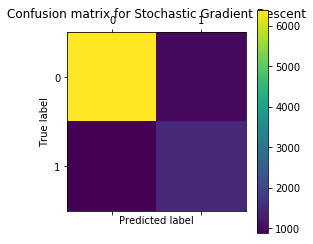

In [239]:
# displaying confusion matrix
sgd_cm = confusion_matrix(income_test_target, pred_sgd2)
print(sgd_cm)
plt.matshow(sgd_cm)
plt.title('Confusion matrix for Stochastic Gradient Descent')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [240]:
#verifing sgd classifier with cross validation income_train, income_train_target
scores_sgd2 = cross_val_score(clf_sgd2, income_train, income_train_target, cv=10,scoring ='accuracy')
print("Cross Validation Score for each K",scores_sgd2)
scores_sgd2.mean()

Cross Validation Score for each K [0.6372807  0.52149123 0.43421053 0.79947345 0.80254498 0.79991224
 0.81439228 0.67134708 0.68758227 0.81035996]


0.6978594724663775

Range of testing accuracy is between 43%-80% which depicts high variation 
Our mean accuracy score is around 69.78%. 
Previous train tests split accuracy score = 80.66%.
So, we can say that this model with cross-validation is under performing with 10.88 points than previous train tests split. Does this mean overfitting,again?

In [241]:
# 32nd Model : Stochastic Gradient Descent Classifier-3
from sklearn.linear_model import SGDClassifier
clf_sgd3 = SGDClassifier(loss="hinge", penalty="l1", class_weight='balanced',max_iter=5,random_state=1)
clf_sgd3.fit(income_train, income_train_target)   
pred_sgd3 = clf_sgd3.predict(income_test)
print("Accuracy", accuracy_score(income_test_target, pred_sgd3))
target_names = ["high-earner = no", "high-earner = yes"]
print(classification_report(income_test_target, pred_sgd3, target_names=target_names))
print(confusion_matrix(income_test_target, pred_sgd3))

Accuracy 0.7271982802743372
                   precision    recall  f1-score   support

 high-earner = no       0.94      0.68      0.79      7401
high-earner = yes       0.47      0.86      0.60      2368

        micro avg       0.73      0.73      0.73      9769
        macro avg       0.70      0.77      0.70      9769
     weighted avg       0.82      0.73      0.75      9769

[[5064 2337]
 [ 328 2040]]


In [242]:
#verifing sgd classifier with cross validation income_train, income_train_target
scores_sgd3 = cross_val_score(clf_sgd3, income_train, income_train_target, cv=10,scoring ='accuracy')
print("Cross Validation Score for each K",scores_sgd3)
scores_sgd3.mean()

Cross Validation Score for each K [0.72017544 0.70526316 0.79824561 0.79201404 0.7819219  0.8095656
 0.8056165  0.74637999 0.80298376 0.78489903]


0.7747065035025763

Range of testing accuracy is between 70.5%-80.9% which depicts variation 
Our mean accuracy score is around 77.47%. 
Previous train tests split accuracy score = 72.7%.
So, we can say that this model with cross-validation is (4.77) better performing than previous train tests split.

### SUPPORT VECTOR MACHINES
 #### SVM-1 : 
 A linear hyper-plane function with default values of support vector classifier

In [208]:
# 33rd Model : SUPPORT VECTOR Classifier-1
from sklearn.svm import SVC
#standard linear SVC
clf_svc = SVC(kernel='linear', C=1.0,class_weight=None,gamma='auto')
clf_svc.fit(income_train, income_train_target)
# test svm 
predicted_svc=clf_svc.predict(income_test)
expected = income_test_target
# summarize the fit of the model
target_names = ["high-earner = no", "high-earner = yes"]
print(accuracy_score(expected,predicted_svc))
print(classification_report(expected, predicted_svc,target_names=target_names ))
print(confusion_matrix(expected, predicted_svc))

print(time.clock() - start_time, "seconds")

0.8199406285187839
                   precision    recall  f1-score   support

 high-earner = no       0.86      0.91      0.88      7401
high-earner = yes       0.66      0.53      0.59      2368

        micro avg       0.82      0.82      0.82      9769
        macro avg       0.76      0.72      0.74      9769
     weighted avg       0.81      0.82      0.81      9769

[[6762  639]
 [1120 1248]]
14562.501422105997 seconds


In [198]:
#verifying svm classifier with cross validation income_train, income_train_target
scores_svc = cross_val_score(clf_svc, income_train, income_train_target, cv=5,scoring ='accuracy')
print("Cross Validation Score for each K",scores_svc)
scores_svc.mean()

Cross Validation Score for each K [0.82605835 0.82276815 0.82737442 0.825362   0.82773755]


0.8258600937527592

Range of testing accuracy is between 82.2%-82.7% which depicts very little variation 
Our mean accuracy score is around 82.58%. 
Previous train tests split accuracy score = 81.99%.
So, we can say that this model with cross-validation is slightly(0.6) better performing than previous train tests split. 

#### SVM-2
Another linear function and class_Weight is changed to 'balanced'

In [154]:
# 34th Model : SUPPORT VECTOR Classifier-2
start_time = time.clock()
from sklearn.svm import SVC
#standard linear SVC
clf_svc2 = SVC(kernel='linear', C=1.0,class_weight='balanced',gamma='auto')
clf_svc2.fit(income_train, income_train_target)
predicted_svc2=clf_svc2.predict(income_test)
expected = income_test_target
# summarize the fit of the model
target_names = ["high-earner = no", "high-earner = yes"]
print(classification_report(expected, predicted_svc2,target_names=target_names))
print(confusion_matrix(expected, predicted_svc2))
print(accuracy_score(expected,predicted_svc2))
print("Time to run", time.clock() - start_time, "seconds")

                   precision    recall  f1-score   support

 high-earner = no       0.94      0.71      0.81      7401
high-earner = yes       0.48      0.85      0.62      2368

        micro avg       0.74      0.74      0.74      9769
        macro avg       0.71      0.78      0.71      9769
     weighted avg       0.83      0.74      0.76      9769

[[5248 2153]
 [ 359 2009]]
0.742860067560651
Time to run 80.76712485799908 seconds


#### SVM-3

Finally, using radial function to handle non-Linearly separable data with noise which is impossible to partition using a line.

In [157]:
# 35th Model : SUPPORT VECTOR Classifier-3
start_time = time.clock()
from sklearn.svm import SVC
#standard linear SVC
clf_rbf = SVC(kernel='rbf', C=1.0, class_weight='balanced',gamma=0.1)
clf_rbf.fit(income_train, income_train_target)
predicted_rbf=clf_rbf.predict(income_test)
expected = income_test_target
# summarize the fit of the model
target_names = ["high-earner = no", "high-earner = yes"]

print(classification_report(expected, predicted_rbf,target_names=target_names))
print(confusion_matrix(expected, predicted_rbf))
print(accuracy_score(expected,predicted_rbf))
print("Time to run", time.clock() - start_time, "seconds")

                   precision    recall  f1-score   support

 high-earner = no       0.92      0.77      0.84      7401
high-earner = yes       0.52      0.80      0.63      2368

        micro avg       0.78      0.78      0.78      9769
        macro avg       0.72      0.79      0.74      9769
     weighted avg       0.83      0.78      0.79      9769

[[5679 1722]
 [ 467 1901]]
0.7759238407206469
Time to run 42.46209188099965 seconds


In [199]:
#verifying svm classifier with cross validation income_train, income_train_target
scores_rbf = cross_val_score(clf_rbf, income_train, income_train_target, cv=5,scoring ='accuracy')
print("Cross Validation Score for each K",scores_rbf)
scores_rbf.mean()

Cross Validation Score for each K [0.78240842 0.78328581 0.7780215  0.78521281 0.77989906]


0.7817655192334035

Range of testing accuracy is between 77%-78% which depicts little variation 
Our mean accuracy score is around 78%. 
Previous train tests split accuracy score = 77.59%.
So, we can say that this model with cross-validation is slightly(0.58) better performing than previous train tests split. 

#### SVM-4
Another radial functionfor non-linear hyper-plane with decreased tolerance for stopping criterion that is from 1e-3 to 1e-2

In [244]:
# 36th Model : SUPPORT VECTOR Classifier-3
start_time = time.clock()
from sklearn.svm import SVC
#standard linear SVC
clf_rbf2 = SVC(kernel='rbf', C=1.0,tol=1e-2, class_weight='balanced',gamma='auto')
clf_rbf2.fit(income_train, income_train_target)
predicted_rbf2=clf_rbf2.predict(income_test)
expected = income_test_target
# summarize the fit of the model
target_names = ["high-earner = no", "high-earner = yes"]
print(classification_report(expected, predicted_rbf2,target_names=target_names))
print(confusion_matrix(expected, predicted_rbf2))
print(accuracy_score(expected,predicted_rbf2))
print("Time to run", time.clock() - start_time, "seconds")

                   precision    recall  f1-score   support

 high-earner = no       0.93      0.76      0.83      7401
high-earner = yes       0.52      0.82      0.64      2368

        micro avg       0.77      0.77      0.77      9769
        macro avg       0.73      0.79      0.74      9769
     weighted avg       0.83      0.77      0.79      9769

[[5607 1794]
 [ 422 1946]]
0.7731599959054151
Time to run 30.634741052002937 seconds


In [245]:
#verifying svm classifier with cross validation income_train, income_train_target
scores_rbf2 = cross_val_score(clf_rbf2, income_train, income_train_target, cv=5,scoring ='accuracy')
print("Cross Validation Score for each K",scores_rbf2)
scores_rbf2.mean()

Cross Validation Score for each K [0.78240842 0.78328581 0.7780215  0.78521281 0.77989906]


0.7817655192334035

Range of testing accuracy is between 77.8%-78.5% which depicts little variation 
Our mean accuracy score is around 78.17%. 
Previous train tests split accuracy score = 77.31%.
So, we can say that this model with cross-validation is slightly(0.86) better performing than previous train tests split. 

### The end: